<a href="https://colab.research.google.com/github/lawsonk16/Object-Detection/blob/main/FasterRcnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Train Model

<i> Note: These paths are not universal - they are relative and require the user to set up their own data directory. With Colab it is difficult to do otherwise. </i>


In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


### Step 1: Make Relevant Imports
We have defined many custom scripts, so we need to add them to our system path

In [2]:
! pip install terminaltables

import sys
paths = ['/content/drive/MyDrive/Colab Notebooks/scripts']

for p in paths:
    sys.path.append(p)

import os
import json
import shutil

from coco_utils.pytorch_coco_detect import *
from ensemble import *
from coco_utils.coco_help import *

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Step 2: Unzip Data, Set Data Paths and Create Data Loaders

In [3]:
data_zip_path = '/content/drive/MyDrive/Colab Notebooks/Clean Datasets/DOTA/DOTA_512.zip'
data_path = '/content/'

shutil.copy2(data_zip_path, data_path)

shutil.unpack_archive(data_zip_path.split('/')[-1])
os.remove(data_zip_path.split('/')[-1])

In [4]:
# change the data tag to match your dataset, if applicable
data_tag = 'DOTA-512'

train_ims = 'train/images/'
val_ims = 'val/images/'

train_anns = f'train/coco_train_512.json'
val_anns = f'val/coco_val_512.json'

make_cat_ids_match(train_anns, val_anns) 

In [5]:
num_workers = 0
train_batch_size = 2
train_data_loader = make_train_loader(train_ims, train_anns, train_batch_size, num_workers)

num_workers = 0
val_batch_size = 1
val_data_loader = make_test_loader(val_ims, val_anns, val_batch_size, num_workers)

loading annotations into memory...
Done (t=0.99s)
creating index...
index created!
loading annotations into memory...
Done (t=0.58s)
creating index...
index created!


### Part 3: Prepare the Model
 - Create a model name for experiments with these hyperparameters
   - If previous training has occurred, this will be the path where that info is stored
 - Load a model of the correct depth

In [6]:
# Check the number of catgeories
with open(train_anns, 'r') as f:
    gt = json.load(f)

cats = gt['categories']

In [7]:
### Modify these variables for your experiment ###
exp_folder = '/content/drive/MyDrive/Colab Notebooks/Experiments/Detection/'
data_name = 'DOTA'
data_split = 'regular'

resnet_backbone = 50
num_classes = len(cats) + 1

optim = 'SGD'
lr = 0.0001
mom = 0.9
wd = 0.0005
pretrained = True

model_path = name_model(exp_folder, data_name, data_split, resnet_backbone, train_batch_size, num_classes, optim, lr, mom, wd, pretrained)
model_path

'/content/drive/MyDrive/Colab Notebooks/Experiments/Detection/DOTA/regular/resnet50fpn/classes_17_optim_SGD_lr_0p0001_mom_0p9_wd_0p0005_pretrained_True_batch_2/best_weights.pt'

### Part 4: Train the Model 
Set a few more hyperparameters, and display precision and recall on validation set at a frequency you set

In [8]:
# Choose a total number of epochs to train with this configuration
num_epochs = 100

# Evaluation Criteria
start_eval_epoch = 5
eval_freq = 10
iou_nms = 0.9

# How often to save
save_freq = 10

# wrap up the data
data_loaders = [train_data_loader, val_data_loader]

# get the model
model = get_fasterrcnn(num_classes, pretrained, resnet_backbone)

losses = train_fasterrcnn(model, model_path, data_loaders, 
                                optim, lr, mom, wd, 
                                num_epochs, start_eval_epoch, eval_freq, iou_nms, save_freq)

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

Loading 77 epochs of training for fasterrcnn
Training epoch 78 of 100


Validation: 100%|██████████| 4036/4036 [04:59<00:00, 13.50it/s]


Training epoch 79 of 100


Validation: 100%|██████████| 4036/4036 [04:58<00:00, 13.53it/s]


Training epoch 80 of 100


Validation: 100%|██████████| 4036/4036 [04:58<00:00, 13.50it/s]


Evalutation on epoch 80


Getting val detections: 100%|██████████| 4036/4036 [04:47<00:00, 14.03it/s]


Saved model history
Training epoch 81 of 100


Validation: 100%|██████████| 4036/4036 [04:55<00:00, 13.67it/s]


Training epoch 82 of 100


Validation: 100%|██████████| 4036/4036 [04:56<00:00, 13.60it/s]


Training epoch 83 of 100


Validation: 100%|██████████| 4036/4036 [04:56<00:00, 13.63it/s]


Lowest val loss: 0.4659561812877655
Training epoch 84 of 100


Validation: 100%|██████████| 4036/4036 [04:55<00:00, 13.67it/s]


Training epoch 85 of 100


Validation: 100%|██████████| 4036/4036 [04:53<00:00, 13.74it/s]


Training epoch 86 of 100


Validation: 100%|██████████| 4036/4036 [04:53<00:00, 13.77it/s]


Training epoch 87 of 100


Validation: 100%|██████████| 4036/4036 [04:53<00:00, 13.76it/s]


Training epoch 88 of 100


Validation: 100%|██████████| 4036/4036 [04:54<00:00, 13.72it/s]


Training epoch 89 of 100


Validation: 100%|██████████| 4036/4036 [04:53<00:00, 13.74it/s]


Training epoch 90 of 100


Validation: 100%|██████████| 4036/4036 [04:54<00:00, 13.72it/s]


Evalutation on epoch 90


Getting val detections: 100%|██████████| 4036/4036 [04:46<00:00, 14.10it/s]


Saved model history
Training epoch 91 of 100


Validation: 100%|██████████| 4036/4036 [04:54<00:00, 13.69it/s]


Training epoch 92 of 100


Validation: 100%|██████████| 4036/4036 [04:53<00:00, 13.74it/s]


Training epoch 93 of 100


Validation: 100%|██████████| 4036/4036 [04:53<00:00, 13.75it/s]


Training epoch 94 of 100


Validation: 100%|██████████| 4036/4036 [04:52<00:00, 13.79it/s]


Training epoch 95 of 100


Validation: 100%|██████████| 4036/4036 [04:53<00:00, 13.75it/s]


Training epoch 96 of 100


Validation: 100%|██████████| 4036/4036 [04:56<00:00, 13.62it/s]


Lowest val loss: 0.45645827054977417
Training epoch 97 of 100


Validation: 100%|██████████| 4036/4036 [04:56<00:00, 13.60it/s]


Lowest val loss: 0.45381221175193787
Training epoch 98 of 100


Validation: 100%|██████████| 4036/4036 [04:53<00:00, 13.73it/s]


Training epoch 99 of 100


Validation: 100%|██████████| 4036/4036 [04:54<00:00, 13.70it/s]


Training epoch 100 of 100


Validation: 100%|██████████| 4036/4036 [04:54<00:00, 13.70it/s]


Evalutation on epoch 100


Getting val detections: 100%|██████████| 4036/4036 [04:47<00:00, 14.02it/s]


Saved model history


## Part 5: Evaluate

In [11]:
conf_thresh = 0.2
iou_thresh = 0.3
nms_thresh = 0.7
save = True

compute_latest_dt_metrics(model_path, val_anns, conf_thresh, iou_thresh, nms_thresh, save)

Computing AP: 100%|██████████| 16/16 [00:00<00:00, 69.03it/s]


+-------+--------------------+---------+
| Index | Class name         | AP      |
+-------+--------------------+---------+
| 0     | small-vehicle      | 0.57656 |
| 1     | harbor             | 0.79393 |
| 2     | large-vehicle      | 0.76664 |
| 3     | ground-track-field | 0.45741 |
| 4     | soccer-ball-field  | 0.53775 |
| 5     | bridge             | 0.58691 |
| 6     | basketball-court   | 0.49665 |
| 7     | tennis-court       | 0.90529 |
| 8     | ship               | 0.86181 |
| 9     | roundabout         | 0.72398 |
| 10    | baseball-diamond   | 0.75199 |
| 11    | swimming-pool      | 0.73256 |
| 12    | plane              | 0.92413 |
| 13    | storage-tank       | 0.74792 |
| 14    | helicopter         | 0.37748 |
| 15    | container-crane    | 0.07222 |
+-------+--------------------+---------+
---- mAP 0.6445764341361712
---- Precision 0.4394684327748394
---- Recall 0.7396737428342746


# New De

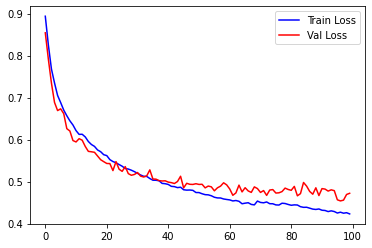

In [10]:
plot_model_performance(model_path)